<div>
<center><img src = https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc.com%2Fimages%2F29567522%2F187556292675%2F1%2Foriginal.jpg?w=800&rect=0%2C0%2C2160%2C1080&s=77f8400ce2b945dcf6598785aa5f58f3 width=600></div>

# <center> Analyzing Weather Data with Python 
## <center>with Greg Filla

# Remove this key before sharing

#### API Key

In [1]:
my_apikey = 'f43934a981fc48f5926e5929d3ee0760'

### Importing Dependencies

In [2]:
import json  #handling API requests
import csv  #used when downloading Csvs
import pandas as pd  #main python module for data cleaning and analysis
import numpy as np  #for use with sklearn
import datetime  #working with timestamps from API
from datetime import timedelta, date  #more granular imports
import time  # used to time functions
import requests  # Main Python module for making HTTP Requests
import os  #used when Python needs to work with the OS/machine it's being processed on 

<br>

## <center> Weather, Weather Weather: Where are all the weather stations?

In order to use the weather APIs, you first need data on the weather stations.

### Dataset: major weather stations in the U.S. and their metadata (`stations.txt`)
This dataset contains information on 97 major weather stations at international airports throughout the United States.
- **ID**: is the station identification code. Please see 'ghcnd-stations.txt' at ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ for a complete list of stations and their metadata.
- **LATITUDE**: is latitude of the station (in decimal degrees)
- **LONGITUDE**: is the longitude of the station (in decimal degrees)
- **ELEVATION**: is the elevation of the station (in meters, missing = -999.9)
- **NAME**: is the name of the station

Note: This stations.txt dataset was taken from a much larger dataset of 98035 weather stations (worldwide). If you are interested, you can download '[ghcnd-stations.txt](ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt)' from [ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/](ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/) for a complete list of stations and their metadata.

In [3]:
!wget --quiet -O stations.csv https://ibm.box.com/shared/static/1f4sqflf054974ceo7yehr1nqscfy8o6.csv

In [4]:
#!ls stations.csv
stations = pd.read_csv('stations.csv')
stations.head()

ID  LATITUDE  LONGITUDE  ELEVATION STATE                NAME  \
0  USW00003017   39.8328  -104.6575     1650.2    CO      DENVER INTL AP   
1  USW00003102   34.0561  -117.6003      289.3    CA     ONTARIO INTL AP   
2  USW00003196   31.4208  -110.8458     1198.5    AZ     NOGALES INTL AP   
3  USW00003822   32.1300   -81.2100       14.0    GA    SAVANNAH INTL AP   
4  USW00003856   34.6439   -86.7861      190.2    AL  HUNTSVILLE INTL AP   

  GSN_FLAG HSN-CRN_FLAG   WMO_ID  
0      NaN          NaN  72565.0  
1      NaN          NaN      NaN  
2      NaN          NaN      NaN  
3      NaN          HCN  72207.0  
4      NaN          NaN  72323.0

<br>

# <center> Getting historical weather data

For historical weather, we send API GET requests to:

> `http://api.weather.com/v1/geocode/`**MY_LATITUDE**`/`**MY_LONGITUDE**`/observations/historical.json?apiKey=`**MY_APIKEY**`&units=`**m**`&startDate=`**YYYYMMDD**`&endDate=`**YYYYMMDD**`



Notice in the link that there are parameters that need to be set:
1. **MY_LATITUDE & MY_LONGITUDE:** The latitude and longitude of the weather station. We have prepared a list of weather stations, as described in the next section
1. **MY_APIKEY:** The API key provided to you for api.weather.com
1. **units=m:** You can change m, which is currently set to Metric units:  
    - For en-US or en, the default units of measure code  is English/Imperial. The units code is “e” .
    - For en-gb, the default units of measure is Hybrid-UK. The units code is  “h”.
    - For everything else, the default units of measure is  Metric. The units code is “m”.
1. **startDate and endDate:** The range that you want to retrieve data for. The maximum range between the two dates is 31 days.

For full documentation on this API for historical weather data: [http://goo.gl/DplOKj](http://goo.gl/DplOKj)

#### Set the values for your GET request URL

In [5]:
lat = stations.LATITUDE[0]
lon = stations.LONGITUDE[0]
units = "m"
startDate = "20160501"
endDate = "20160501"

In [6]:
url = "http://api.weather.com/v1/geocode/" + str(lat) + "/" + str(lon)+ \
    "/observations/historical.json?apiKey=" + my_apikey + \
    "&units=" + units + \
    "&startDate="+str(startDate) + \
    "&endDate="+str(endDate)

In [7]:
url # take a look at the url 

'http://api.weather.com/v1/geocode/39.8328/-104.6575/observations/historical.json?apiKey=f43934a981fc48f5926e5929d3ee0760&units=m&startDate=20160501&endDate=20160501'

#### GET request for historical data

In [8]:
import requests
r = requests.get(url).json()
r

{u'metadata': {u'expire_time_gmt': 1490425984,
  u'language': u'en-US',
  u'latitude': 39.83,
  u'longitude': -104.65,
  u'status_code': 200,
  u'transaction_id': u'1490422384636:459555735',
  u'units': u'm',
  u'version': u'1'},
 u'observations': [{u'blunt_phrase': None,
   u'class': u'observation',
   u'clds': u'OVC',
   u'day_ind': u'N',
   u'dewPt': -1,
   u'expire_time_gmt': 1462089840,
   u'feels_like': -5,
   u'gust': None,
   u'heat_index': 1,
   u'icon_extd': 1601,
   u'key': u'KDEN',
   u'max_temp': None,
   u'min_temp': None,
   u'obs_id': u'KDEN',
   u'obs_name': u'Denver/Intl',
   u'precip_hrly': 0.0,
   u'precip_total': None,
   u'pressure': 837.41,
   u'pressure_desc': None,
   u'pressure_tend': None,
   u'primary_swell_direction': None,
   u'primary_swell_height': None,
   u'primary_swell_period': None,
   u'primary_wave_height': None,
   u'primary_wave_period': None,
   u'qualifier': None,
   u'qualifier_svrty': None,
   u'rh': 89,
   u'secondary_swell_direction': None

#### The JSON result

In [9]:
r.keys()

[u'observations', u'metadata']

In [10]:
len(r['observations']) #number of observations in the duration requested

48

In [11]:
r['observations'][0]

{u'blunt_phrase': None,
 u'class': u'observation',
 u'clds': u'OVC',
 u'day_ind': u'N',
 u'dewPt': -1,
 u'expire_time_gmt': 1462089840,
 u'feels_like': -5,
 u'gust': None,
 u'heat_index': 1,
 u'icon_extd': 1601,
 u'key': u'KDEN',
 u'max_temp': None,
 u'min_temp': None,
 u'obs_id': u'KDEN',
 u'obs_name': u'Denver/Intl',
 u'precip_hrly': 0.0,
 u'precip_total': None,
 u'pressure': 837.41,
 u'pressure_desc': None,
 u'pressure_tend': None,
 u'primary_swell_direction': None,
 u'primary_swell_height': None,
 u'primary_swell_period': None,
 u'primary_wave_height': None,
 u'primary_wave_period': None,
 u'qualifier': None,
 u'qualifier_svrty': None,
 u'rh': 89,
 u'secondary_swell_direction': None,
 u'secondary_swell_height': None,
 u'secondary_swell_period': None,
 u'snow_hrly': None,
 u'temp': 1,
 u'terse_phrase': None,
 u'uv_desc': u'Low',
 u'uv_index': 0,
 u'valid_time_gmt': 1462082640,
 u'vis': 3,
 u'water_temp': None,
 u'wc': -5,
 u'wdir': 320,
 u'wdir_cardinal': u'NW',
 u'wspd': 22,
 u'wx_

### JSON to Pandas DataFrame - 2 Methods

#### Method 1 - json_normalize - *Wide* format

In [12]:
from pandas.io.json import json_normalize

In [13]:
wide_format = json_normalize(r['observations'])

In [14]:
wide_format.head()

blunt_phrase        class clds day_ind  dewPt  expire_time_gmt  feels_like  \
0         None  observation  OVC       N     -1       1462089840          -5   
1         None  observation  OVC       N     -1       1462091940          -6   
2         None  observation  OVC       N     -2       1462092780          -6   
3         None  observation  OVC       N     -2       1462096380          -5   
4         None  observation  OVC       N     -2       1462098480          -6   

   gust  heat_index  icon_extd         ...         uv_index  valid_time_gmt  \
0  None           1       1601         ...                0      1462082640   
1  None           1       1601         ...                0      1462084740   
2  None           1       1601         ...                0      1462085580   
3  None           1       1601         ...                0      1462089180   
4  None           1       1691         ...                0      1462091280   

   vis water_temp wc  wdir  wdir_cardinal  wspd wx_icon           wx_phrase  
0    3       None -5   320             NW    22      14          Light Snow  
1    3       None -6   320             NW    26      14          Light Snow  
2    3       None -6   330            NNW    28      14          Light Snow  
3    3       None -5   350              N    28      14          Light Snow  
4    3       None -6   340            NNW    33      14  Light Snow / Windy  

[5 rows x 45 columns]

#### Method 2 - dataframe from lists - *Long* format

In [15]:
timestamp = []
measurement = []
value = []

for obs in range(1, len(r['observations'])):
    obstime = time.ctime(r['observations'][obs]['valid_time_gmt'])
    timestamp.extend([obstime] * len(r['observations'][0].keys()))
    measurement.extend(r['observations'][obs].keys())  
    value.extend(r['observations'][obs].values())

latitude = [r['metadata']['latitude']] * len(timestamp)
longitude = [r['metadata']['longitude']] * len(timestamp)
obs_name = [r['observations'][0]['obs_name']] * len(timestamp)

long_format = pd.DataFrame(zip(obs_name, latitude, longitude, timestamp, measurement, value), 
             columns= ['obs_name', 'latitude', 'longitude', 'timestamp', 'measurement', 'value'])

long_format.head()

obs_name  latitude  longitude                 timestamp  \
0  Denver/Intl     39.83    -104.65  Sun May  1 01:39:00 2016   
1  Denver/Intl     39.83    -104.65  Sun May  1 01:39:00 2016   
2  Denver/Intl     39.83    -104.65  Sun May  1 01:39:00 2016   
3  Denver/Intl     39.83    -104.65  Sun May  1 01:39:00 2016   
4  Denver/Intl     39.83    -104.65  Sun May  1 01:39:00 2016   

               measurement       value  
0      primary_wave_period        None  
1  primary_swell_direction        None  
2             terse_phrase        None  
3          expire_time_gmt  1462091940  
4                      vis           3

#### We can persist the data in object storage

--- 

For object storage - http://datascience.ibm.com/blog/working-with-object-storage-in-data-science-experience-python-edition/

---

#### Note: API requests are limited to 30-day intervals
Note the API request for historical day have a limitation of requesting 30-day intervals of data at a time.

Use this function to conveniently set 30-day intervals based on your start and end dates:

In [16]:
def getDates(start_date, end_date, delta = 30):
    '''
    Returns a list of date intervals of delta number of days, that encompasses the entire duration between start_date and end_date
    start_date: starting date in format YYYYMMDD
    end_date: end date in format YYYYMMDD
    delta: set as number of days for the interval; the interval between start_date and end_date; default = 30
    '''
    from datetime import timedelta, date
    delta = delta -1
    #Convert dates to date format
    s = datetime.date(int(str(start_date)[:4]),int(str(start_date)[4:6]),int(str(start_date)[6:]))
    e = datetime.date(int(str(end_date)[:4]),int(str(end_date)[4:6]),int(str(end_date)[6:]))

    #Set delta
    if (int(delta) > 30 or int(delta) < 1):
        raise ValueError('Error: delta out of range. 1 <= delta <= 30')
    else:
        delta = timedelta(days=int(delta))

    days= []
    day_from = s
    while (day_from) < e:
        day_to = day_from + delta
        days.append((day_from,day_to))
        print '...for range %s to %s ...' % (day_from.strftime("%Y%m%d"), day_to.strftime("%Y%m%d"))
        day_from += delta
    return days

In [17]:
getDates(20150101,20151231,30)

...for range 20150101 to 20150130 ...
...for range 20150130 to 20150228 ...
...for range 20150228 to 20150329 ...
...for range 20150329 to 20150427 ...
...for range 20150427 to 20150526 ...
...for range 20150526 to 20150624 ...
...for range 20150624 to 20150723 ...
...for range 20150723 to 20150821 ...
...for range 20150821 to 20150919 ...
...for range 20150919 to 20151018 ...
...for range 20151018 to 20151116 ...
...for range 20151116 to 20151215 ...
...for range 20151215 to 20160113 ...


[(datetime.date(2015, 1, 1), datetime.date(2015, 1, 30)),
 (datetime.date(2015, 1, 30), datetime.date(2015, 2, 28)),
 (datetime.date(2015, 2, 28), datetime.date(2015, 3, 29)),
 (datetime.date(2015, 3, 29), datetime.date(2015, 4, 27)),
 (datetime.date(2015, 4, 27), datetime.date(2015, 5, 26)),
 (datetime.date(2015, 5, 26), datetime.date(2015, 6, 24)),
 (datetime.date(2015, 6, 24), datetime.date(2015, 7, 23)),
 (datetime.date(2015, 7, 23), datetime.date(2015, 8, 21)),
 (datetime.date(2015, 8, 21), datetime.date(2015, 9, 19)),
 (datetime.date(2015, 9, 19), datetime.date(2015, 10, 18)),
 (datetime.date(2015, 10, 18), datetime.date(2015, 11, 16)),
 (datetime.date(2015, 11, 16), datetime.date(2015, 12, 15)),
 (datetime.date(2015, 12, 15), datetime.date(2016, 1, 13))]

## 5-day Forecasts

For historical weather, we send API GET requests to:

> `http://api.weather.com/v1/geocode/`**MY_LATITUDE**`/`**MY_LONGITUDE**`/forecast/daily/`**5day**`.json?apiKey=`**MY_APIKEY**`&units=`**m**

Remember:
1. **MY_LATITUDE & MY_LONGITUDE:** The latitude and longitude of the weather station. We have prepared a list of weather stations, as described in the next section
1. **MY_APIKEY:** The API key provided to you for api.weather.com
1. **units=m:** You can change m, which is currently set to Metric units:  
    - For en-US or en, the default units of measure code  is English/Imperial. The units code is “e” .
    - For en-gb, the default units of measure is Hybrid-UK. The units code is  “h”.
    - For everything else, the default units of measure is  Metric. The units code is “m”.
1. You can also change the forecast to:
    - 3day
    - 5day
    - 7day
    - 10day

For full documentation on this API for forecast weather data: [http://goo.gl/AoxGl3](http://goo.gl/AoxGl3)

#### Set the values for your GET request URL

In [18]:
url = "http://api.weather.com/v1/geocode/" + str(lat) + "/" + str(lon)+ \
    "/forecast/daily/5day.json?apiKey=" + my_apikey + \
    "&units=" + units

In [19]:
url

'http://api.weather.com/v1/geocode/39.8328/-104.6575/forecast/daily/5day.json?apiKey=f43934a981fc48f5926e5929d3ee0760&units=m'

#### GET request for forecast data

In [20]:
import requests
r = requests.get(url).json()
r

{u'forecasts': [{u'blurb': None,
   u'blurb_author': None,
   u'class': u'fod_long_range_daily',
   u'dow': u'Friday',
   u'expire_time_gmt': 1490423583,
   u'fcst_valid': 1490360400,
   u'fcst_valid_local': u'2017-03-24T07:00:00-0600',
   u'lunar_phase': u'Waning Crescent',
   u'lunar_phase_code': u'WNC',
   u'lunar_phase_day': 26,
   u'max_temp': None,
   u'min_temp': 0,
   u'moonrise': u'2017-03-24T04:57:05-0600',
   u'moonset': u'2017-03-24T15:44:17-0600',
   u'narrative': u'Mostly clear. Low 0C.',
   u'night': {u'accumulation_phrase': u'',
    u'alt_daypart_name': u'Overnight',
    u'clds': 20,
    u'day_ind': u'N',
    u'daypart_name': u'Tonight',
    u'fcst_valid': 1490403600,
    u'fcst_valid_local': u'2017-03-24T19:00:00-0600',
    u'golf_category': u'',
    u'golf_index': None,
    u'hi': 1,
    u'icon_code': 33,
    u'icon_extd': 3300,
    u'long_daypart_name': u'Friday night',
    u'narrative': u'Mostly clear. Low near 0C. Winds S at 10 to 15 km/h.',
    u'num': 1,
    u'ph

#### The JSON result

In [21]:
r.keys()

[u'forecasts', u'metadata']

In [22]:
len(r['forecasts']) #number of forecasts

6

In [23]:
r['forecasts'][0]

{u'blurb': None,
 u'blurb_author': None,
 u'class': u'fod_long_range_daily',
 u'dow': u'Friday',
 u'expire_time_gmt': 1490423583,
 u'fcst_valid': 1490360400,
 u'fcst_valid_local': u'2017-03-24T07:00:00-0600',
 u'lunar_phase': u'Waning Crescent',
 u'lunar_phase_code': u'WNC',
 u'lunar_phase_day': 26,
 u'max_temp': None,
 u'min_temp': 0,
 u'moonrise': u'2017-03-24T04:57:05-0600',
 u'moonset': u'2017-03-24T15:44:17-0600',
 u'narrative': u'Mostly clear. Low 0C.',
 u'night': {u'accumulation_phrase': u'',
  u'alt_daypart_name': u'Overnight',
  u'clds': 20,
  u'day_ind': u'N',
  u'daypart_name': u'Tonight',
  u'fcst_valid': 1490403600,
  u'fcst_valid_local': u'2017-03-24T19:00:00-0600',
  u'golf_category': u'',
  u'golf_index': None,
  u'hi': 1,
  u'icon_code': 33,
  u'icon_extd': 3300,
  u'long_daypart_name': u'Friday night',
  u'narrative': u'Mostly clear. Low near 0C. Winds S at 10 to 15 km/h.',
  u'num': 1,
  u'phrase_12char': u'M Clear',
  u'phrase_22char': u'Mostly Clear',
  u'phrase_32

<hr>

# <center> Mapping & Clustering Weather Data

### `US_weather_2014.csv`:
We have compiled a cleaned dataset, **`US_weather_2014.csv`**, which contains daily measurements from 97 weather stations located at international airports in the United States, from 2014-01-01 to 2014-12-31.
- **STN_ID**: is the station identification code.
- **OBSV_DATE**: is the observation date in format: YYYYMMDD
- **LATITUDE**: is the latitude of the station 
- **LONGITUDE**: is the Longitude of the station 
- **MAX_TEMP**: is the maximum temperature in day
- **MIN_TEMP**: is the minimum temperature in day
- **MEAN_TEMP**: is the average temperature in day 

#### Get the data:

In [24]:
!wget --quiet -O US_weather_2014.csv https://ibm.box.com/shared/static/ruy6hff75uiukoy0f949zbjok4m7ijzc.csv
!ls US_weather_2014.csv

US_weather_2014.csv


## Import CSV as Pandas dataframe
And create new columns for YEAR, MONTH, DAY

In [25]:
filename='US_weather_2014.csv'

In [26]:
#Establish header names
colnames = [
            "STN_ID", 
            "OBSV_DATE", 
            "LATITUDE",
            "LONGITUDE",
            "MAX_TEMP", 
            "MIN_TEMP",
            "MEAN_TEMP"]

#Read csv
pdf = pd.read_csv(filename, index_col = 0)
pdf.columns=colnames

#Create columns for YEAR, MONTH, DAY
pdf['YEAR'] = pdf.OBSV_DATE.apply(str).str[:4]
pdf['MONTH'] = pdf.OBSV_DATE.apply(str).str[5:7]
pdf['DAY'] = pdf.OBSV_DATE.apply(str).str[8:10]

#Make sure data only contains data from year 2014
pdf = pdf[pdf.YEAR == '2014']

print "First 4 rows of the data:"
print pdf.head(4)

First 4 rows of the data:
         STN_ID   OBSV_DATE  LATITUDE  LONGITUDE  MAX_TEMP  MIN_TEMP  \
0  Philadelphia  2014-02-15     39.86     -75.23       3.0       1.0   
1       Jackson  2014-08-05     32.32     -90.07      34.0      20.0   
2       Houlton  2014-02-26     46.12     -67.79      -7.0     -24.0   
3  Akron/Fulton  2014-07-01     41.03     -81.46      32.0      24.0   

   MEAN_TEMP  YEAR MONTH DAY  
0   1.612245  2014    02  15  
1  26.625000  2014    08  05  
2 -13.080000  2014    02  26  
3  27.200000  2014    07  01  


## Flitering data
If we don't want to extend our map to Hawaii, we can filter based on latitude/longitude

In [27]:
pdf = pdf[(pdf.LONGITUDE<-50) & (pdf.LONGITUDE>-130) & (pdf.LATITUDE<50) & (pdf.LATITUDE>25)]

# To print list of stations
stn_list = pdf[["STN_ID","LATITUDE","LONGITUDE"]].drop_duplicates()
print stn_list.head(4)

         STN_ID  LATITUDE  LONGITUDE
0  Philadelphia     39.86     -75.23
1       Jackson     32.32     -90.07
2       Houlton     46.12     -67.79
3  Akron/Fulton     41.03     -81.46


## Visualization of Stations 
You can use the **basemap** package in Python to build maps. 

In [28]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

#increase figure size
from pylab import rcParams
rcParams['figure.figsize'] = (14,10)

### World maps

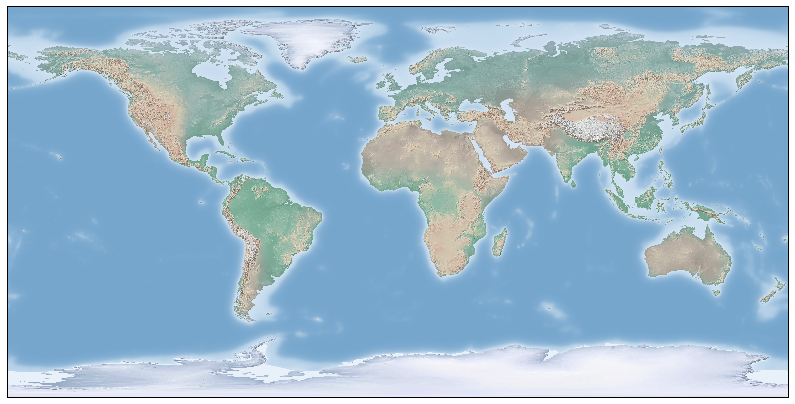

In [29]:
Basemap().shadedrelief()

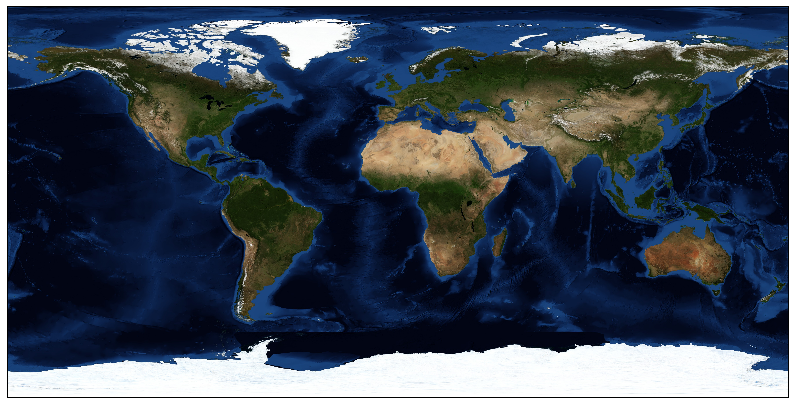

In [30]:
Basemap().bluemarble()

### Plotting an area

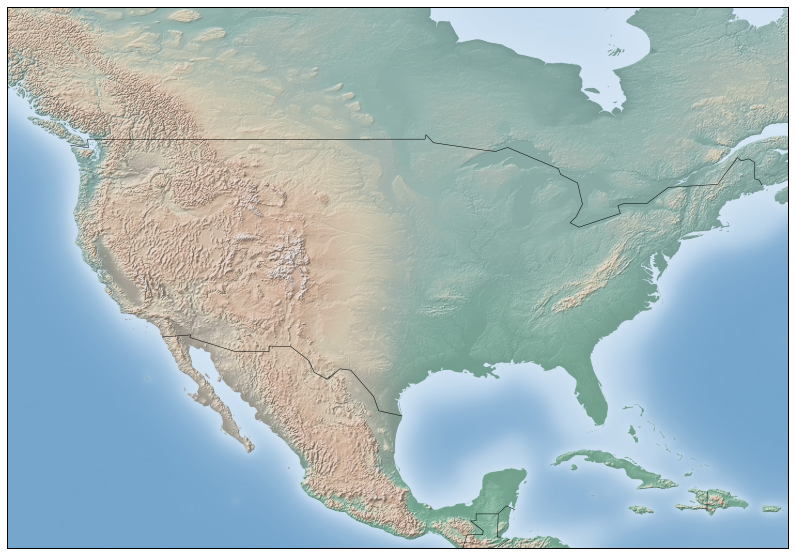

In [31]:
#47.6062° N, 122.3321° W
#28.5383° N, 81.3792° W
my_map = Basemap(
            llcrnrlon=-130, llcrnrlat=15, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=-65, urcrnrlat=60) #max longitude (urcrnrlon) and latitude (urcrnrlat)
my_map.shadedrelief()
my_map.drawcountries()

### Plotting one location (longitude, latitude)

Let's plot **Seattle**!

(47.6062° N, 122.3321° W)

Latitude: 47.6062  
Longitude: -122.3321

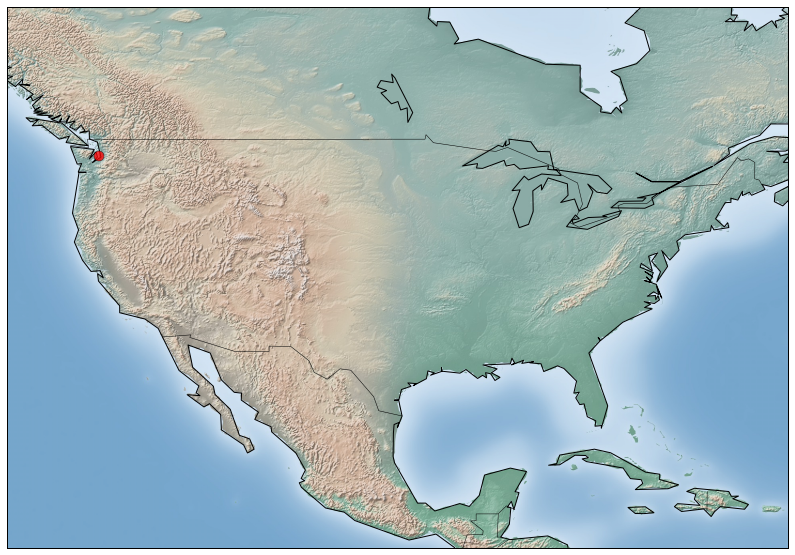

In [32]:
#Seattle
lat = 47.6062
lon = -122.3321

my_map.plot(lon, 
            lat,
            markerfacecolor = 'red', 
            marker='o', 
            markersize= 10, 
            alpha = 0.75)
my_map.shadedrelief()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawcoastlines()

### Try plotting San Francisco!
Can you find the longitude and latitude of San Francisco on your own?

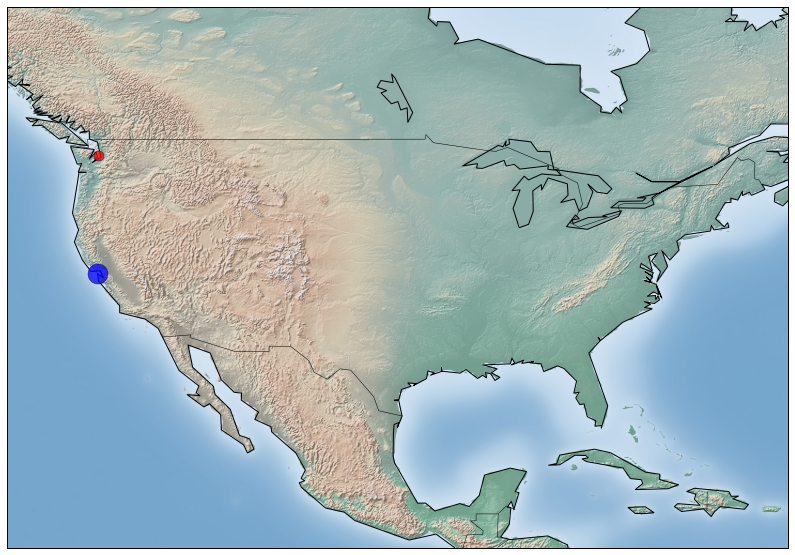

In [33]:
#San Francisco 37.7749° N, 122.4194° W
lat = 37.7749
lon = -122.4194

my_map.plot(lon, 
            lat,
            markerfacecolor = 'blue',  #blue, green, or even (R,G,B)
            marker='o', 
            markersize= 10*2, 
            alpha = 0.75)

#Seattle
lat = 47.6062
lon = -122.3321
my_map.plot(lon, 
            lat,
            markerfacecolor = 'red', 
            marker='o', 
            markersize= 10, 
            alpha = 0.75)

my_map.shadedrelief()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawcoastlines()

### Plotting Text

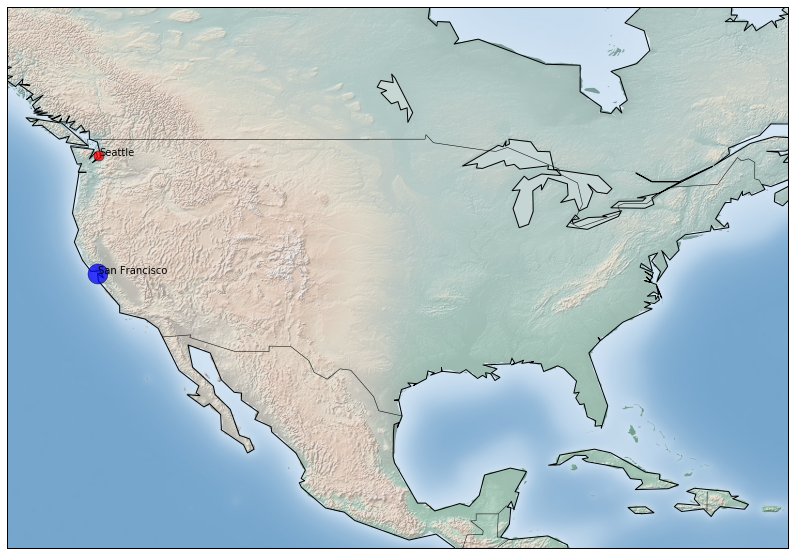

In [34]:
#San Francisco 37.7749° N, 122.4194° W
lat = 37.7749
lon = -122.4194
name = "San Francisco" #added name

my_map.plot(lon, 
            lat,
            markerfacecolor = 'blue',  #blue, green, or even (R,G,B)
            marker='o', 
            markersize= 10*2, 
            alpha = 0.75)

#Adding text for San Francisco
plt.text(lon, lat, name,
             size = 10, 
             color = "black")

#Seattle
lat = 47.6062
lon = -122.3321
name = "Seattle" #added name
my_map.plot(lon, 
            lat,
            markerfacecolor = 'red', 
            marker='o', 
            markersize= 10, 
            alpha = 0.75)

#Adding text for Seattle
plt.text(lon, lat, name,
             size = 10, 
             color = "black")

my_map.shadedrelief()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawcoastlines()
my_map.fillcontinents(color = 'white', alpha = 0.3)

### Plotting all the weather data on the map

Plotting each weather station on the map, sized by mean temperature

Size of markers represent mean temperature


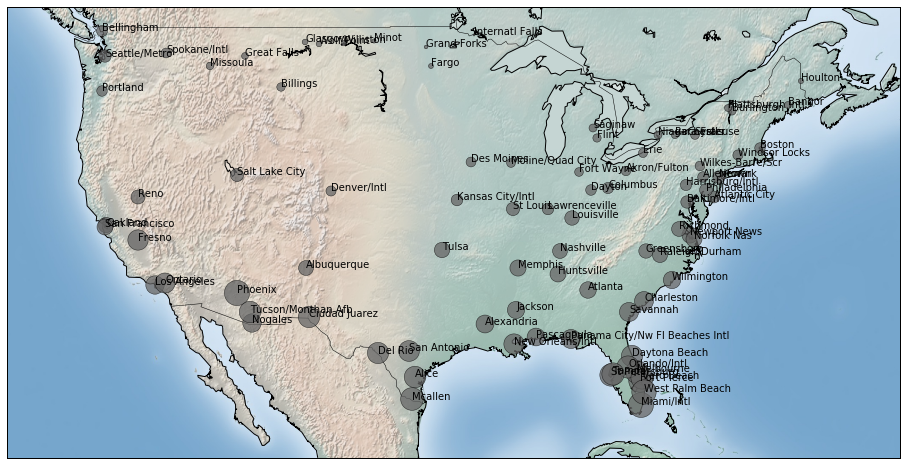

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = (16,12)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=-130, llcrnrlat=22, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=-60, urcrnrlat=50) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To group data based on stations        
gp = pdf.groupby("STN_ID")
mins = gp.MEAN_TEMP.min()
maxs = gp.MEAN_TEMP.max()
means= gp.MEAN_TEMP.mean()
lats = gp.LATITUDE.first()
lons = gp.LONGITUDE.first()
stns = gp.STN_ID.first()
vals = np.nan_to_num(np.array(abs(means))) #mean temperature
xs,ys = my_map(np.asarray(lons), np.asarray(lats))

#Visualization1
for lat,lon,val,stn,x,y in zip (lats,lons,vals,stns,xs,ys):
    my_map.plot(x, y,markerfacecolor =([0.4,0.4,0.4]),  marker='o', markersize= (val), alpha = 0.75)
    plt.text(x,y,stn)
    
print "Size of markers represent mean temperature"
plt.show()

## Clustering of data

K-means Algorithm is used from sklearn package to cluster stations. This clustering is based on the closeness of stations, average, maximum and minimum temperatur in year. 
The number of clusteres is 4. 
The fit method is used to learn the clusters on train data and returns an array of integer labels corresponding to the different clusters. The labels over the training data can be found in the labels_ attribute.

In [36]:
from sklearn.cluster import KMeans
import sklearn.utils
clusterNum = 10
sklearn.utils.check_random_state(1000)

'''
print xs[0:5]
print ys[0:5]
print maxs[0:5]
print mins[0:5]
print means[0:5]
'''

Clus_dataSet = zip(xs,ys,np.asarray(maxs),np.asarray(mins),np.asarray(means))
Clus_dataSet = np.nan_to_num(Clus_dataSet) #nans => 0
est = KMeans(n_clusters=clusterNum)
est.fit(Clus_dataSet)
labels = est.labels_

print "A sample of stations and their cluster IDs:"
zip(stns,labels)[0:9]


A sample of stations and their cluster IDs:


[('Akron/Fulton', 8),
 ('Albuquerque', 1),
 ('Alexandria', 4),
 ('Alice', 4),
 ('Allentown', 0),
 ('Atlanta', 3),
 ('Atlantic City', 0),
 ('Baltimore/Intl', 0),
 ('Bangor', 7)]

## Visualization of clusters on map
Each cluster of stations is visualized here by different colors.

/usr/local/src/bluemix_jupyter_bundle.v37/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/src/bluemix_jupyter_bundle.v37/notebook/lib/python2.7/site-packages/matplotlib/lines.py:1107: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


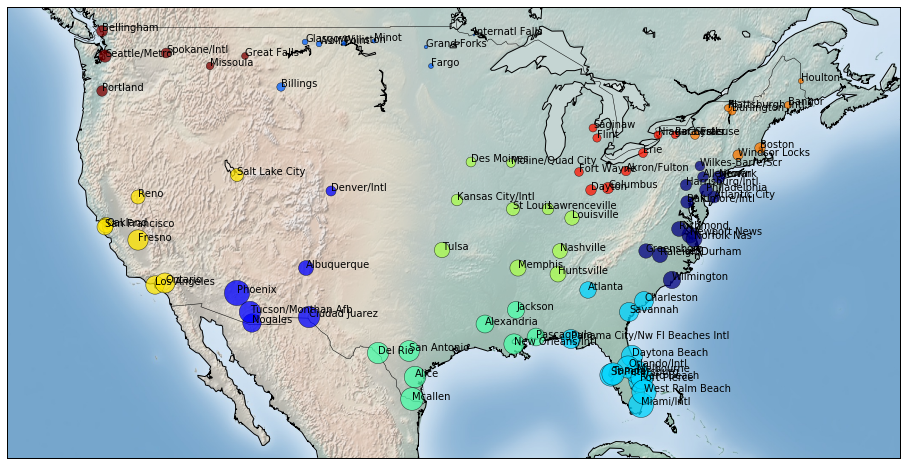

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = (16,12)


my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=-130, llcrnrlat=22, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=-60, urcrnrlat=50) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for lat,lon,val,label,stn,x,y in zip (lats,lons,vals,labels,stns,xs,ys):
    my_map.plot(x, y, markerfacecolor = colors[label.astype(np.float)], marker='o', markersize= (val), alpha = 0.75)
    plt.text(x,y,stn)
plt.show()

## Visualization of time-series in each cluster
We group data by stations and calculate the maximum and minimum observed temperature for each month. Then the behaviour of each cluster of stationes is depicted. 

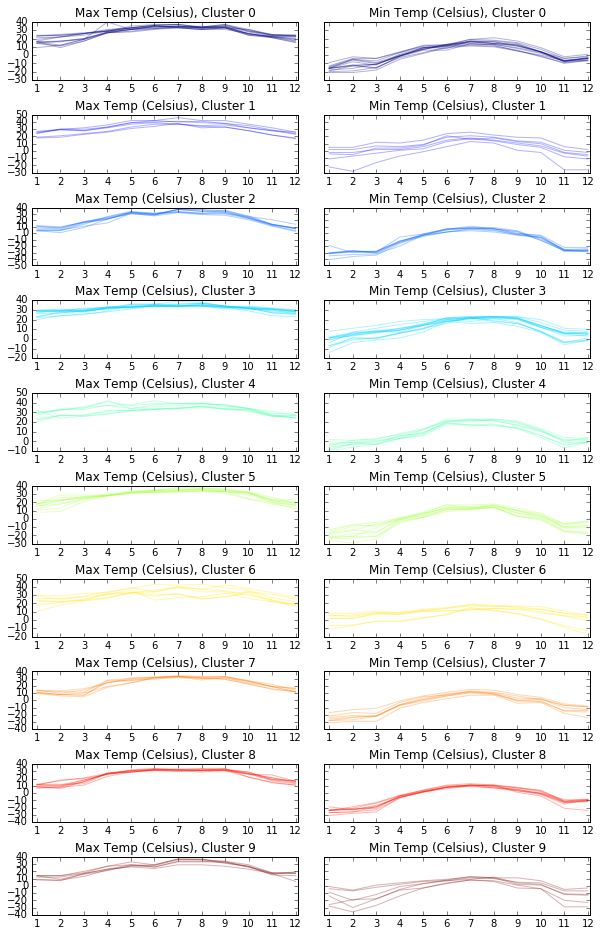

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = (10,16)

# To group data by station and date
gpm=pdf.groupby(["STN_ID","YEAR","MONTH"])
TS_mins= gpm.MIN_TEMP.min()
TS_maxs= gpm.MAX_TEMP.max()
TS_mtemp=gpm.MEAN_TEMP.mean()
TS_lats = gpm.LATITUDE.first()
TS_lons = gpm.LONGITUDE.first()
TS_gstns= gpm.STN_ID.first()
TS_xs,TS_ys= my_map(np.asarray(TS_lons), np.asarray(TS_lats))
Vis_dataSet=zip(TS_gstns,TS_xs,TS_ys,TS_mins,TS_maxs,TS_mtemp)
#print 'Vis_dataset len:'+ str(len(Vis_dataSet))
#print Vis_dataSet


mmax=[]
mmin=[]
f, axarr = plt.subplots(clusterNum, 2, sharey='row')
clusters=range(clusterNum)
for i in clusters:
    c=stns[labels==i] #stations[labels from sklearn cluster model == current cluster label] - get stations in current cluster
    cluster = [row for row in Vis_dataSet if row[0] in c] #keep rows if the station is in the cluster we want
    
    for stn in c: #for each of these stations
        
        stndata=[obs for obs in cluster if obs[0]==stn] #get all the data for current station for all observations from the vis_dataset
        
        # Min temperature visualization
        max_temp = tuple(x[4] for x in stndata)
        line1 = axarr[i,0].plot(range(1, len(max_temp)+1),max_temp)
        plt.setp(line1,color=colors[i], linewidth=1.0, alpha=0.3)
        axarr[i, 0].set_xlim(0.8,12.1)
        axarr[i, 0].set_xticks(xrange(1,13))
        axarr[i, 0].set_title('Max Temp (Celsius), Cluster '+str(i))
        mmax.append(max_temp)
        
        # Max temperature visualization
        min_temp = tuple(x[3] for x in stndata)
        line2 = axarr[i,1].plot(range(1, len(max_temp)+1),min_temp)
        plt.setp(line2, color=colors[i], linewidth=1.0, alpha=0.3)
        axarr[i, 1].set_xlim(0.8,12.1)
        axarr[i, 1].set_xticks(xrange(1,13))
        axarr[i, 1].set_title('Min Temp (Celsius), Cluster '+str(i))
        mmin.append(min_temp)
        
    # To visualize the centroids of each cluster
    maxcentroid=map(lambda x:np.nanmean(x),zip(*mmax))
    #linemaxcentroid=axarr[i,0].plot(range(len(maxcentroid)),maxcentroid)
    #plt.setp(linemaxcentroid,color=colors[i], linewidth=3.0)
    mincentroid=map(lambda x:np.nanmean(x),zip(*mmin))
    #linemincentroid=axarr[i,1].plot(range(len(mincentroid)),mincentroid)
    #plt.setp(linemincentroid,color=colors[i], linewidth=3.0) 
f.subplots_adjust(hspace=0.6)
f.subplots_adjust(wspace=0.1)
plt.show()



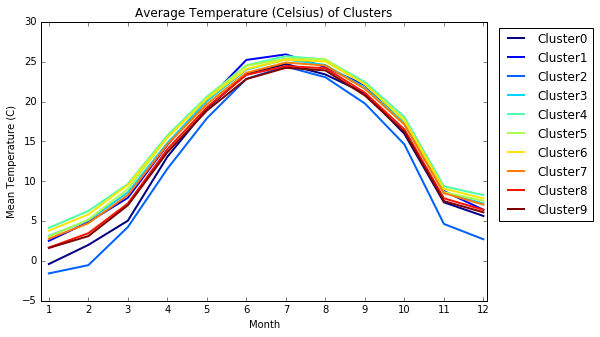

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = (8,5)

clusters=range(clusterNum)
mmean=[]
for i in clusters:
    c=stns[labels==i]
    cluster = [row for row in Vis_dataSet if row[0] in c]
    for stn in c:
        stndata=[obs for obs in cluster if obs[0]==stn]
        # Mean temperature visualization
        mean_temp=tuple(x[5] for x in stndata)
        mmean.append(mean_temp)
    # To visualize the centroids of each cluster
    meancentroid=map(lambda x:np.nanmean(x),zip(*mmean))
    linemeancentroid=plt.plot(range(1, len(meancentroid)+1),meancentroid)
    plt.setp(linemeancentroid,color=colors[i], linewidth=2.0)


plt.title('Average Temperature (Celsius) of Clusters')
plt.ylabel('Mean Temperature (C)')
plt.xlabel('Month')
plt.xlim(0.8,12.1)
plt.xticks(range(1,13))

plt.legend([('Cluster' + str(x)) for x in clusters], bbox_to_anchor=(1.25, 1))
plt.show()



<hr>

# Starting points for your Data Science Project Challenge

Weather x
- Traffic Accidents (Seattle): https://data.seattle.gov/Public-Safety/Traffic-Accidents/7ayk-pspk/data
- Seattle Police Department 911 Incident Response: https://data.seattle.gov/Public-Safety/Seattle-Police-Department-911-Incident-Response/3k2p-39jp
- Seattle Real Time Fire 911 Calls: https://data.seattle.gov/Public-Safety/Seattle-Real-Time-Fire-911-Calls/upug-ckch
- Seattle Open Data Catalog: https://data.seattle.gov/browse?sortBy=most_accessed&sortPeriod=week

<hr>

# <center> Want to brush up your skills in data science?
<center> Check out the free courses available on [Big Data U](https://bigdatauniversity.com/courses?utm_source=cbfseattle&utm_medium=notebook):

<a href=https://bigdatauniversity.com/courses?utm_source=cbfseattle&utm_medium=notebook><img src=https://ibm.box.com/shared/static/efpg9z7rt2ljo9qdrt6m7pqwisau55wd.png width=800></a>